In [371]:
import pandas as pd
!pip3 install seaborn
import seaborn as sns
!pip3 install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [372]:
database = pd.read_csv('1database.csv')

X=database["X"].to_numpy().reshape(-1, 1)
Y=database["Y"].to_numpy()

model = LinearRegression().fit(X, Y)

mean_x = X.mean()
mean_y = Y.mean()

c0 = model.coef_[0]
c1 = model.intercept_

r2 = model.score(X,Y)

print(mean_x, mean_y)
print(c0, c1)
print(r2)

11.8 25.1
1.6696637998436277 5.3979671618451945
0.8525475628109431


In [373]:
database = pd.read_csv('2database.csv')

X_train, X_test, y_train, y_test = train_test_split(
    database.drop('Weight', axis=1),
    database['Weight'],
    test_size=0.2,
    random_state=21,
    stratify=database["Species"]
)

X_train = pd.concat([X_train, X_test])
y_train = pd.concat([y_test, y_train])
X_test = pd.read_csv('3database.csv')
#database = pd.read_csv('3database.csv')

X_train = X_train.drop('Species', axis=1)
X_test = X_test.drop('Species', axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

#print(r2_score(y_test, model.predict(X_test)))

LinearRegression()

0.9962761645834379


LinearRegression()

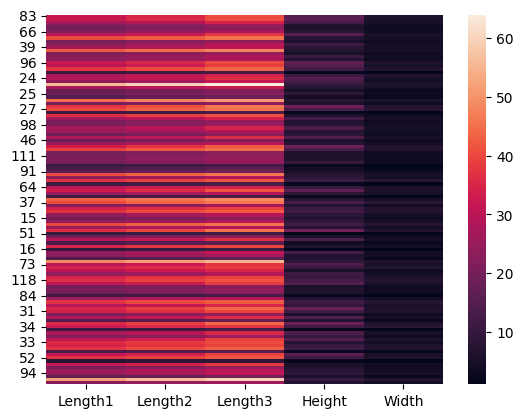

In [374]:
sns.heatmap(X_train)
Length_train = []
Length_test = []
for key in X_train['Length1'].keys():
    Length_train.append([X_train['Length1'][key], X_train['Length2'][key], X_train['Length3'][key]])
for key in X_test['Length1'].keys():
    Length_test.append([X_test['Length1'][key], X_test['Length2'][key], X_test['Length3'][key]])
pca = PCA(n_components=3, svd_solver='full')
pca.fit(Length_train)

print(pca.explained_variance_ratio_[0])

X_train = X_train.drop('Length3', axis=1).drop('Length2', axis=1).drop('Length1', axis=1)
X_train['Lengths']=pca.transform(Length_train)[:, 0]
X_test = X_test.drop('Length3', axis=1).drop('Length2', axis=1).drop('Length1', axis=1)
X_test['Lengths']=pca.transform(Length_test)[:, 0]

model = LinearRegression()
model.fit(X_train, y_train)

#print(r2_score(y_test, model.predict(X_test)))

In [375]:
for key in X_train['Width'].keys():
    X_train['Width'][key] = X_train['Width'][key]**3
    X_train['Height'][key] = X_train['Height'][key]**3
    X_train['Lengths'][key] = X_train['Lengths'][key]**3
for key in X_test['Width'].keys():
    X_test['Width'][key] = X_test['Width'][key]**3
    X_test['Height'][key] = X_test['Height'][key]**3
    X_test['Lengths'][key] = X_test['Lengths'][key]**3

/tmp/ipykernel_19479/355301012.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Width'][key] = X_train['Width'][key]**3
/tmp/ipykernel_19479/355301012.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3

In [376]:
print(X_train['Width'].mean())
model = LinearRegression()
model.fit(X_train, y_train)
#print(r2_score(y_test, model.predict(X_test)))

128.92916356818105


LinearRegression()

In [377]:
species_dummies = pd.get_dummies(database['Species'])
#print(species_dummies)
species = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
for key in X_train['Lengths'].keys():
    for specy in species:
        X_train[specy]=species_dummies[specy]
model = LinearRegression()
model.fit(X_train, y_train)
#print(r2_score(y_test, model.predict(X_test)))

LinearRegression()

In [378]:
database = pd.read_csv('3database.csv')
species_dummies = pd.get_dummies(database['Species'])
species = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
for key in X_test['Lengths'].keys():
    for specy in species:
        X_test[specy]=species_dummies[specy]
model = LinearRegression()
model.fit(X_train, y_train)
predicts = model.predict(X_test)
for predict in predicts:
    print(f'{predict}, ')

464.2668410223807, 
483.56502302036705, 
468.4295809923983, 
392.75004648054016, 
389.54061555705727, 
487.7541615421733, 
438.3569706297054, 
301.313228611672, 
378.3209193995431, 
457.7573652311545, 
1489.3321783246702, 
496.87391999113777, 
307.6097782926558, 
548.6882061918432, 
393.29982617525553, 
288.9049360794169, 
467.7758647926846, 
242.77035587123817, 
1138.3010907537682, 
476.5212870796959, 
279.7140628839503, 
468.1950518010301, 
465.75045699262466, 
496.01197561078186, 
236.28462815337286, 
480.73017744037577, 
182.07202840711588, 
400.48317829457153, 
458.487779587255, 
354.53555347554595, 
257.7120825264808, 
334.49494517157177, 
305.6381293370972, 
392.91204041391615, 
415.1678883920515, 
450.31880004486845, 
490.689137715387, 
485.04930524068163, 
262.5046014742958, 
493.5187803628113, 
